In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('Competitions_limpio.csv')
df.head()

,Unnamed: 0,date,description,prize,tags,teams,title,topic
0,0,2014-09-16,Use the ATLAS experiment to identify the Higgs...,13000,NaN,1785,Higgs Boson Machine Learning Challenge,Featured
1,1,2013-09-29,Predict which 311 issues are most important to...,1000,NaN,80,See Click Predict Fix - Hackathon,Featured
2,2,2018-08-14,High Energy Physics particle tracking in CERN ...,25000,"physics, tabular data",653,TrackML Particle Tracking Challenge,Featured
3,3,2015-07-01,Use Google's Word2Vec for movie reviews,0,"film, text data, binary classification",578,Bag of Words Meets Bags of Popcorn,Getting Started
4,4,2012-09-12,Develop a Gesture Recognizer for Microsoft Kin...,10000,NaN,30,CHALEARN Gesture Challenge 2,Research


In [13]:
del df['Unnamed: 0']

In [14]:
df.dtypes

date           object
description    object
prize           int64
tags           object
teams           int64
title          object
topic          object
dtype: object

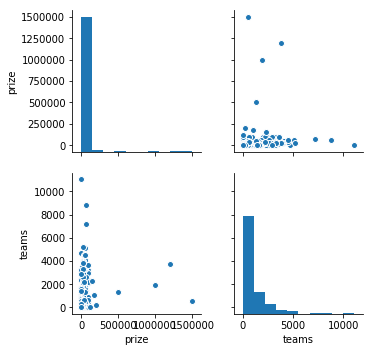

In [15]:
sns.pairplot(df)
plt.show()

In [17]:
df.columns.values

array(['date', 'description', 'prize', 'tags', 'teams', 'title', 'topic'],
      dtype=object)

In [18]:
df.shape

(329, 7)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 7 columns):
date           329 non-null object
description    329 non-null object
prize          329 non-null int64
tags           178 non-null object
teams          329 non-null int64
title          329 non-null object
topic          329 non-null object
dtypes: int64(2), object(5)
memory usage: 18.1+ KB


In [20]:
df.describe()

,prize,teams
count,3.290000e+02,329.000000
mean,3.171346e+04,962.914894
std,1.236679e+05,1320.944045
min,0.000000e+00,6.000000
25%,0.000000e+00,163.000000
50%,8.000000e+03,454.000000
75%,2.500000e+04,1314.000000
max,1.500000e+06,11070.000000


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

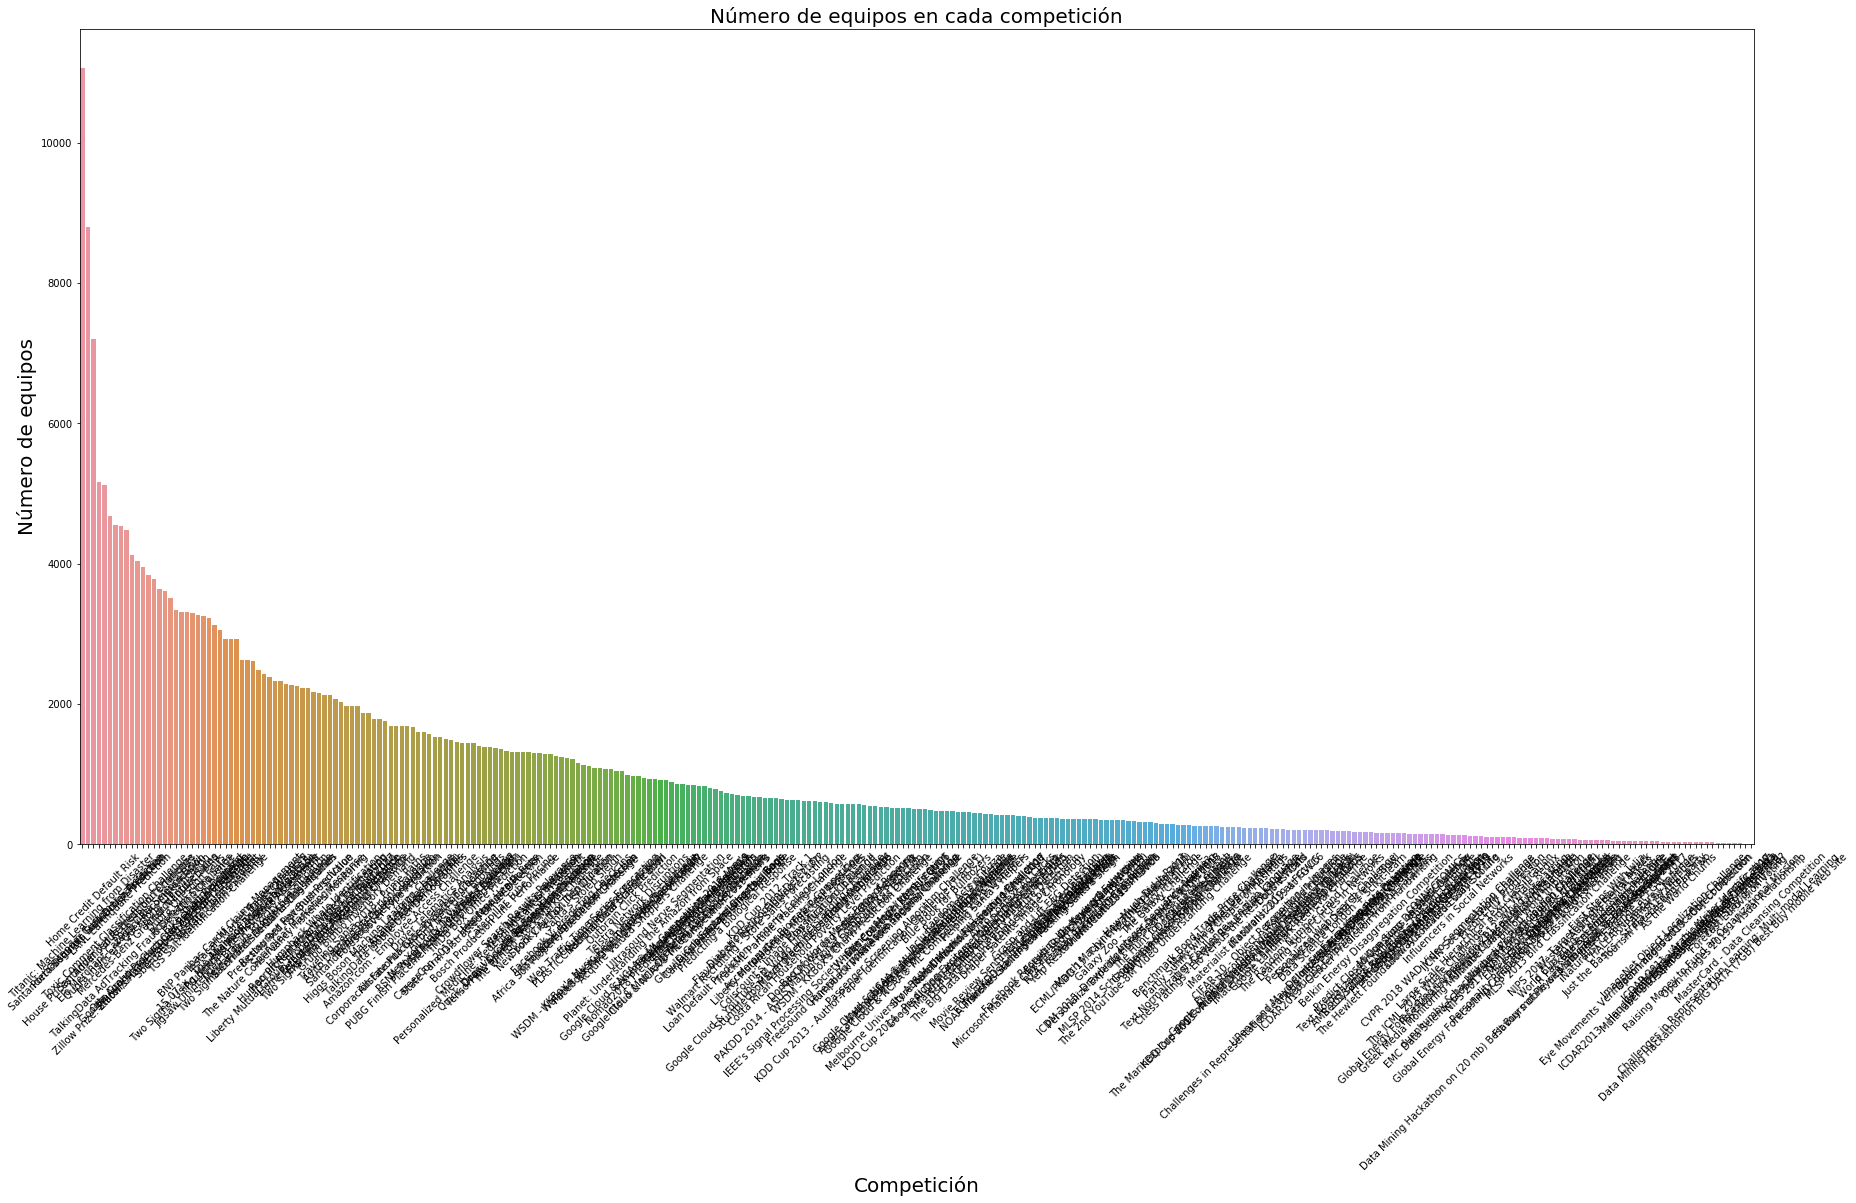

In [22]:
df_competitors = df[['title','teams']].groupby('teams').max()
df_competitors.reset_index(level=0, inplace=True)
df_competitors.sort_values(by='teams',ascending=False, inplace=True)
plt.figure(figsize=(30,15))
sns.barplot(x=df_competitors['title'],y=df_competitors['teams'])
plt.title('Número de equipos en cada competición',fontsize = 20)
plt.xlabel('Competición',fontsize = 20)
plt.ylabel('Número de equipos',fontsize = 20)
plt.xticks(rotation=45)

In [23]:
df_maxcomp = df_competitors[['teams','title']].groupby('title').max()
df_maxcomp.reset_index(level=0,inplace=True)
df_maxcomp.sort_values(by='teams',ascending=False, inplace=True)
df_maxcomp.columns = ['title', 'teams']
df_maxcomp.head()

,title,teams
261,Titanic: Machine Learning from Disaster,11070
224,Santander Customer Transaction Prediction,8802
108,Home Credit Default Risk,7198
194,Porto Seguro’s Safe Driver Prediction,5169
223,Santander Customer Satisfaction,5123


La competición con más participantes es la de "Titanic: Machine Learning from Disaster", ¿estará relacionado con el premio (rewardQuantity)?

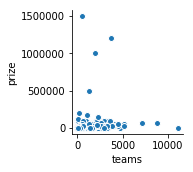

In [24]:
 sns.pairplot(df, x_vars='teams', y_vars='prize')

No parece haber una relación líneal entre el número de equipos participantes y el premio de cada una de las competiciones.

In [26]:
df_cor = df[['teams','prize']]
df_cor.corr()

,teams,prize
teams,1.000000,0.131605
prize,0.131605,1.000000


### En el tiempo

¿Cómo ha evolucionado el número de competiciones a lo largo de los años? Primero creamos una nueva columna solo con el año.

In [34]:
df['date'] = pd.to_datetime(df['date'])

In [37]:
df['year'] = df['date'].dt.year
df.head()

,date,description,prize,tags,teams,title,topic,year
0,2014-09-16,Use the ATLAS experiment to identify the Higgs...,13000,NaN,1785,Higgs Boson Machine Learning Challenge,Featured,2014
1,2013-09-29,Predict which 311 issues are most important to...,1000,NaN,80,See Click Predict Fix - Hackathon,Featured,2013
2,2018-08-14,High Energy Physics particle tracking in CERN ...,25000,"physics, tabular data",653,TrackML Particle Tracking Challenge,Featured,2018
3,2015-07-01,Use Google's Word2Vec for movie reviews,0,"film, text data, binary classification",578,Bag of Words Meets Bags of Popcorn,Getting Started,2015
4,2012-09-12,Develop a Gesture Recognizer for Microsoft Kin...,10000,NaN,30,CHALEARN Gesture Challenge 2,Research,2012


In [38]:
df.year.unique()

array([2014, 2013, 2018, 2015, 2012, 2011, 2019, 2016, 2010, 2100, 2017,
       2020, 2029], dtype=int64)

Tenemos datos desde el 2010 hasta el 20100 (se explica más adelante).

In [41]:
df_compperyear = df[['year','title']].groupby('year').count()
df_compperyear.reset_index(level=0, inplace=True)
df_compperyear

,year,title
0,2010,7
1,2011,15
2,2012,34
3,2013,39
4,2014,31
5,2015,42
6,2016,34
7,2017,39
8,2018,46
9,2019,37


In [45]:
df[(df['year'] == 2020)]

,date,description,prize,tags,teams,title,topic,year
79,2020-01-01,"Final project for ""How to win a data science c...",0,NaN,3314,Predict Future Sales,Playground,2020


In [46]:
df[(df['year'] == 2029)]

,date,description,prize,tags,teams,title,topic,year
115,2029-12-31,Identify the objects in images,0,"object detection, image data",38,ImageNet Object Localization Challenge,Research,2029


Sorprende encontrar competiciones que acaban en 2020 o 2029. En la competición que acaba en 2020, comprobamos que realmente es así(https://www.kaggle.com/c/competitive-data-science-predict-future-sales/overview/evaluation). La que acaba en 2029, encontramos la siguiente nota en su descripción: Note: The competition is set to live on Kaggle indefinitely. Do not consider the listed deadline of December 31, 2029 to have any significant meaning. Por lo tanto, es una competición con fecha de cierre indefinido. 

Por otra parte, las 3 competiciones que acaban en 2100, son competiciones que no tienen fecha de fin asignada y tal como y como describíamos en la limpieza de datos del 'Dt_Competitions_INFO', se les asigno una fecha a futuro indeterminada.

Por lo tanto, a efectos de análisis estas competiciones no deberían de considerarse inicialmente. Inicialmente las eliminamos y asignamos el resto a un nuevo df, a fin de poder realizar un gráfico que no quede desvirtuado. Se eliminan las competiciones con fecha de fin indeterminado, 4 en total.

In [58]:
df2=df[df['year']< 2021].dropna()
df2.head()

,date,description,prize,tags,teams,title,topic,year
2,2018-08-14,High Energy Physics particle tracking in CERN ...,25000,"physics, tabular data",653,TrackML Particle Tracking Challenge,Featured,2018
3,2015-07-01,Use Google's Word2Vec for movie reviews,0,"film, text data, binary classification",578,Bag of Words Meets Bags of Popcorn,Getting Started,2015
6,2019-06-08,Categorize animals in the wild,0,"image data, multiclass classification",344,iWildCam 2019 - FGVC6,Playground,2019
7,2016-03-15,Transforming How We Diagnose Heart Disease,200000,"image data, healthcare",192,Second Annual Data Science Bowl,Featured,2016
8,2015-05-16,Predict probabilistic distribution of hourly r...,500,tabular data,321,How Much Did It Rain?,Research,2015


Evolución del número de competiciones a lo largo de los años.

In [59]:
df_compperyear = df2[['year','title']].groupby('year').count()
df_compperyear.reset_index(level=0, inplace=True)
df_compperyear

,year,title
0,2013,1
1,2014,1
2,2015,36
3,2016,33
4,2017,38
5,2018,34
6,2019,31


Text(0,0.5,'Competiciones')

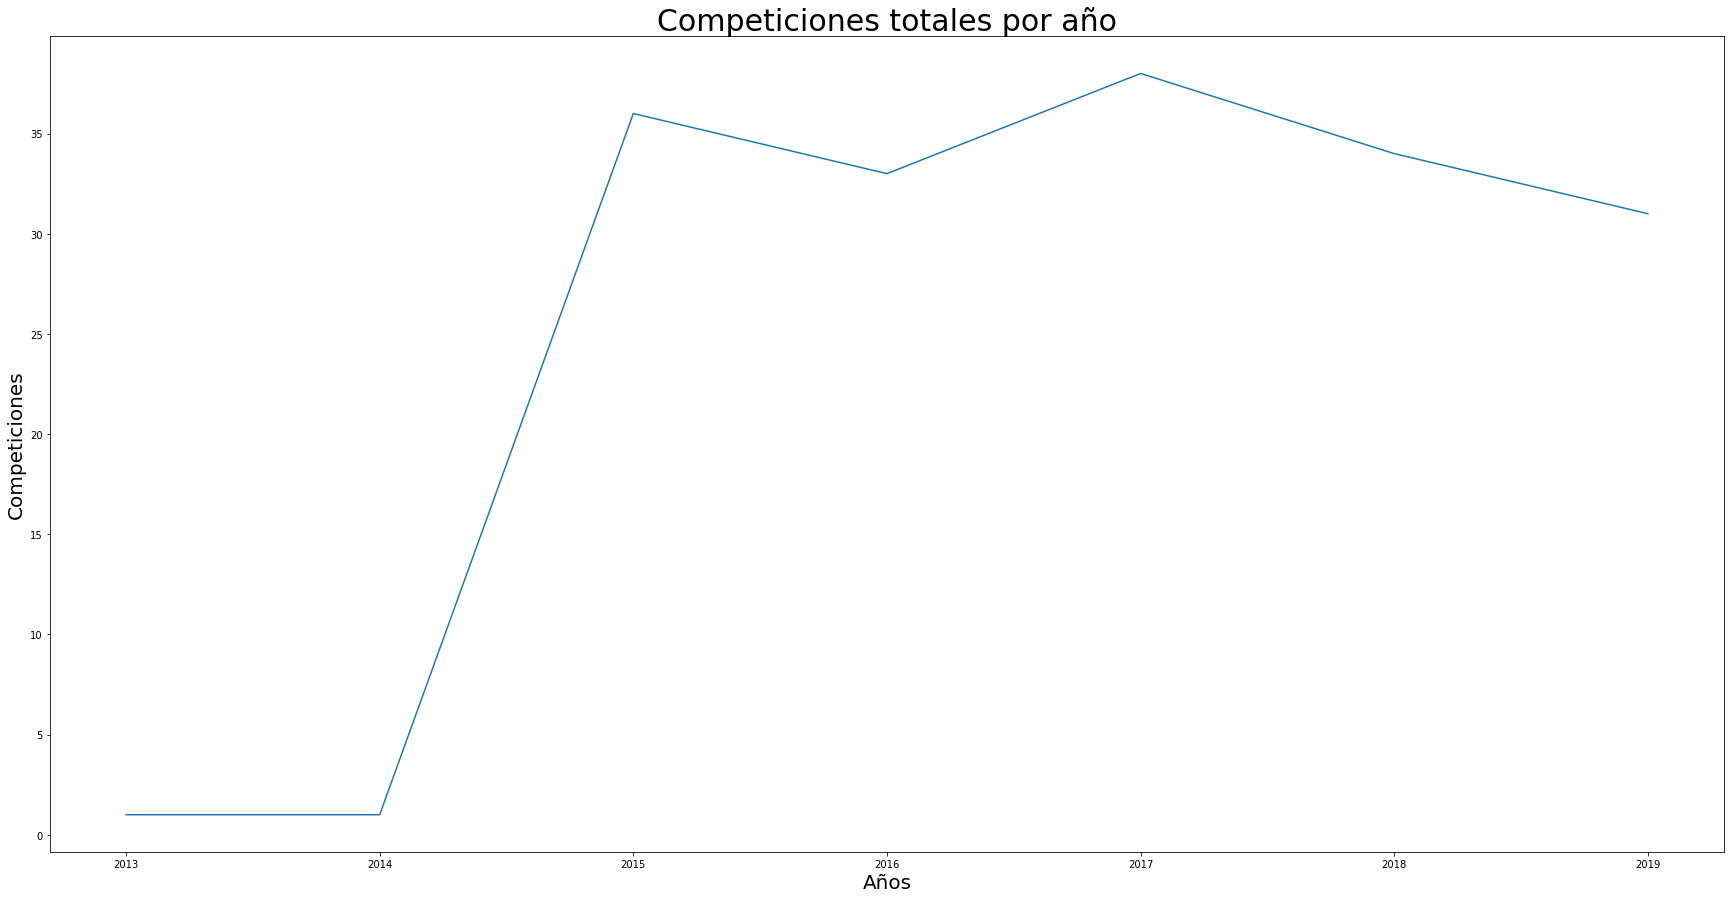

In [62]:
plt.figure(figsize=(30,15))
plt.plot(df_compperyear['year'],df_compperyear['title'])
plt.title('Competiciones totales por año',fontsize=30)
plt.xlabel('Años',fontsize = 20)
plt.ylabel('Competiciones',fontsize = 20)

Evolución de los equipos participantes a lo largo de los años.

In [63]:
df_teamsperyear = df2[['year','teams']].groupby('year').sum()
df_teamsperyear.reset_index(level=0, inplace=True)
df_teamsperyear

,year,teams
0,2013,625
1,2014,248
2,2015,37603
3,2016,46995
4,2017,44627
5,2018,51426
6,2019,55345


Text(0,0.5,'Número de equipos')

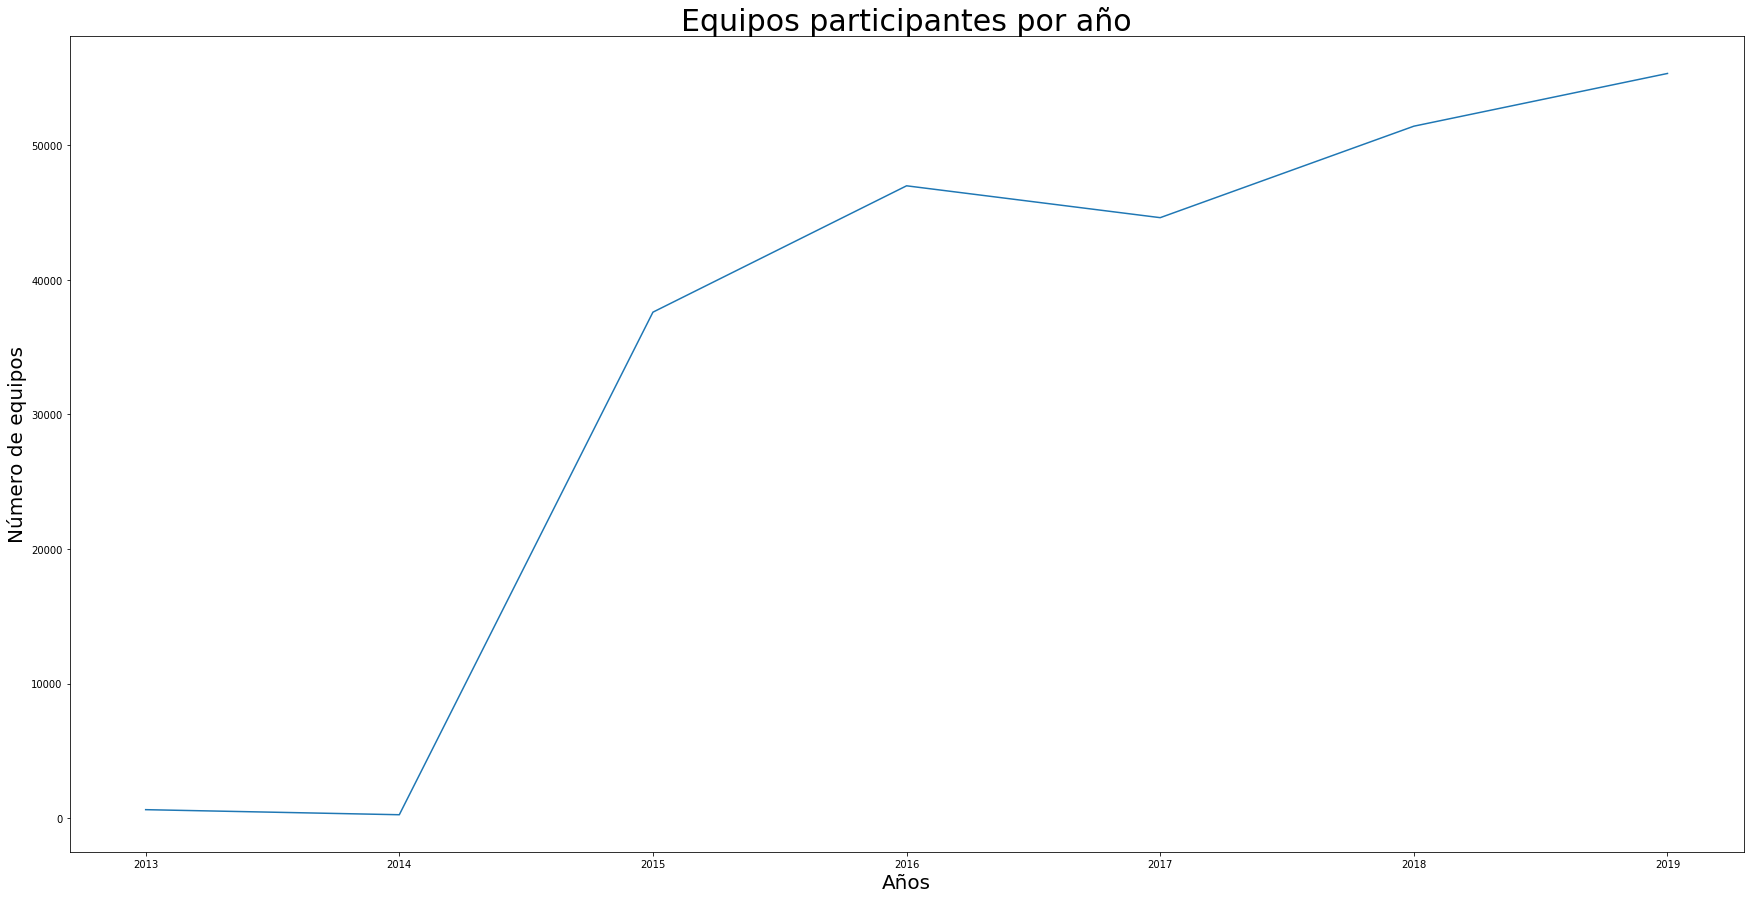

In [64]:
plt.figure(figsize=(30,15))
plt.plot(df_teamsperyear['year'],df_teamsperyear['teams'])
plt.title('Equipos participantes por año',fontsize=30)
plt.xlabel('Años',fontsize = 20)
plt.ylabel('Número de equipos',fontsize = 20)

Los años 2013 y 2014, solo muestran una competición cada uno, por lo que no son muy significativos. A partir del año 2015, se aprecia un repunte en el número de competiciones muy importante que empieza a decrecer a partir del año 2017. Sin embargo, aunque este mismo patrón se aprecia en el número de equipos participantes, a partir del año 2017 se diferencia en que a pesar de decrecer el número de competiciones el número de equipos que participa en ellas cada vez es mayor.

## Predicción